### Previous: <a href = "keras_05.ipynb">1.5 Overfitting VS generalization</a>

# <center> Keras </center>
## <center>1.6 Increasing/Decreasing number of layers</center>

# Explanation
There are three types of layers:
- input layer
- hidden layer
- output layer

One hidden layer is sufficient for the large majority of problems.

There is no "magic" rule to calculate the number of hidden layers and nodes of Neural Network, but there are some tips and recommendations.

The number of hidden nodes is based on a relationship between:

- Number of input and output nodes
- Amount of training data available
- Complexity of the function that is trying to be learned
- The training algorithm
- To minimize the error and have a trained network that generalizes well, you need to pick an optimal number of hidden layers, as well as nodes in each hidden layer.

- Too few nodes will lead to high error for your system as the predictive factors might be too complex for a small number of nodes to capture

- Too many nodes will overfit to your training data and not generalize well

<img src="img/hiddenlayers.png" width="60%" />

<img src="img/structure_layer.PNG" width="60%" />

## Bad practice
Adding to many layers won't necessarily increase your accuracy. It may lead to overfitting.

In [4]:
#previously done
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD, Adam, Adamax
from keras.utils import np_utils
from keras.utils.vis_utils import model_to_dot
from keras.datasets import mnist
from keras.utils import np_utils
%matplotlib inline
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG
#Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#Reshape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
#Split
X_train = X_train[0:1000]
X_test = X_test[0:1000]
Y_train = Y_train[0:1000]
Y_test = Y_test[0:1000]

def plot_training_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    #loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# Example

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0900 - acc: 0.0930 - val_loss: 0.0900 - val_acc: 0.1070
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0900 - acc: 0.0930 - val_loss: 0.0900 - val_acc: 0.1070
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0900 - acc: 0.0930 - val_loss: 0.0900 - val_acc: 0.1070
Epoch 4/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0900 - acc: 0.0930 - val_loss: 0.0900 - val_acc: 0.1070
Epoch 5/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0900 - acc: 0.0930 - val_loss: 0.0900 - val_acc: 0.1070
Epoch 6/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0900 - acc: 0.0930 - val_loss: 0.0900 - val_acc: 0.1070
Epoch 7/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0900 - acc: 0.0930 - val_loss: 0.0900 - val_acc: 0.1080
Epoch 8/10
100

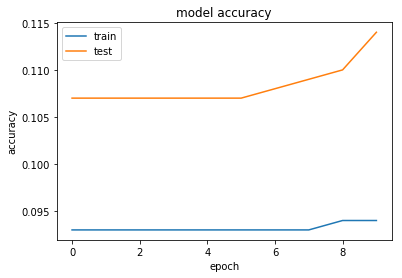

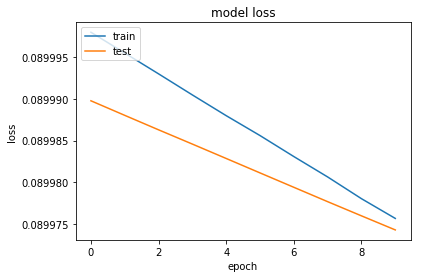

In [5]:
model = Sequential()
model.add(Dense(input_dim=28*28, units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='mse',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

BATCH_SIZE=100
NP_EPOCHS=10
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NP_EPOCHS,
                    verbose=1, validation_data=(X_test, Y_test))
plot_training_history(history)

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 0s 435us/step - loss: 0.0918 - acc: 0.1070 - val_loss: 0.0908 - val_acc: 0.1140
Epoch 2/10
1000/1000 [==============================] - 0s 186us/step - loss: 0.0909 - acc: 0.1260 - val_loss: 0.0902 - val_acc: 0.1320
Epoch 3/10
1000/1000 [==============================] - 0s 196us/step - loss: 0.0902 - acc: 0.1560 - val_loss: 0.0897 - val_acc: 0.1620
Epoch 4/10
1000/1000 [==============================] - 0s 190us/step - loss: 0.0895 - acc: 0.1960 - val_loss: 0.0891 - val_acc: 0.1880
Epoch 5/10
1000/1000 [==============================] - 0s 164us/step - loss: 0.0888 - acc: 0.2450 - val_loss: 0.0886 - val_acc: 0.2230
Epoch 6/10
1000/1000 [==============================] - 0s 193us/step - loss: 0.0881 - acc: 0.2760 - val_loss: 0.0881 - val_acc: 0.2520
Epoch 7/10
1000/1000 [==============================] - 0s 178us/step - loss: 0.0874 - acc: 0.3020 - val_loss: 0.0876 - val_acc: 0.2870


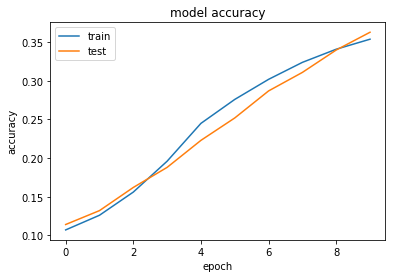

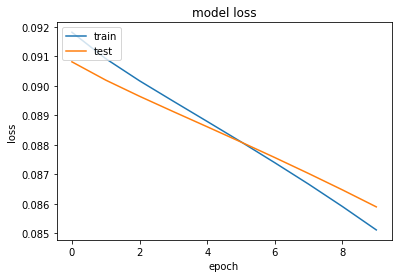

In [6]:
model = Sequential()
model.add(Dense(input_dim=28*28, units=500, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='mse',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

BATCH_SIZE=100
NP_EPOCHS=10
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NP_EPOCHS,
                    verbose=1, validation_data=(X_test, Y_test))
plot_training_history(history)

# Task
Compare the graphs of the two results regarding their number of layers.

# Feedback

### Next: <a href = "keras_07.ipynb">1.7 Batch size and number of epochs</a>